<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/health_Insurance(AutoGluon)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We have to install AutoGluon from auto.gluon.ai/dev/install.htmlfor using it in COlab or jupyter notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

     |████████████████████████████████| 2.1 MB 5.8 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.1 MB/s eta 0:00:0000:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 23.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 143.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.2/279.2 kB 215.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 163.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.6/285.6 kB 127.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# AutoGlon is modularized into sub-modules for: 1. Tabular, 2.  Text, 3. Images
from autogluon.tabular import TabularDataset, TabularPredictor

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_df['region'].nunique()

4

# Perform EXPLORATORY DATA ANALYSIS

In [ ]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
insurance_df.describe(include = 'all') # TO get all the unique values

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index

In [ ]:
data = insurance_df.groupby(by = 'region')

In [ ]:
data.mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [ ]:
data_age = insurance_df.groupby(by = 'age')

In [ ]:
data1 = pd.DataFrame(data_age.mean())

In [ ]:
data1.head()

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802


In [ ]:
data1[data1['charges'] == max(data1['charges'])]

,bmi,children,charges
age,,,
64,32.976136,0.772727,23275.530837


In [ ]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

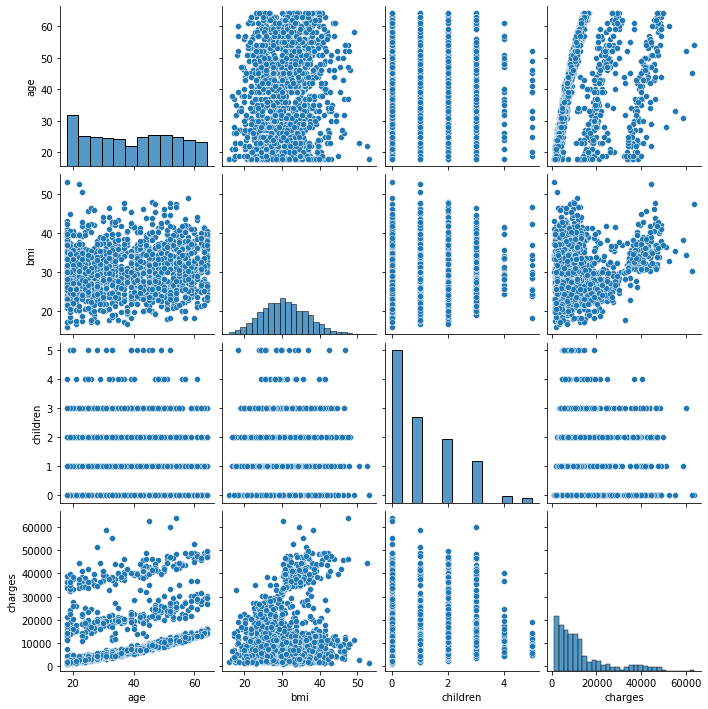

In [ ]:
sns.pairplot(insurance_df)

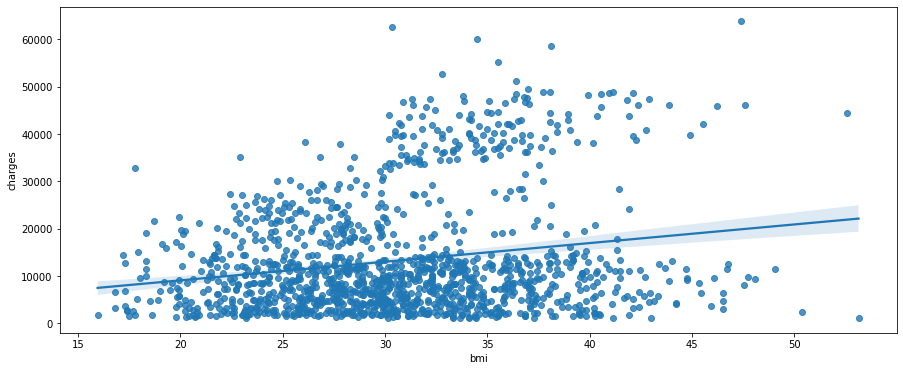

In [ ]:
plt.figure(figsize = (15,6))
sns.regplot(x = 'bmi',y = 'charges', data = insurance_df)
plt.show()

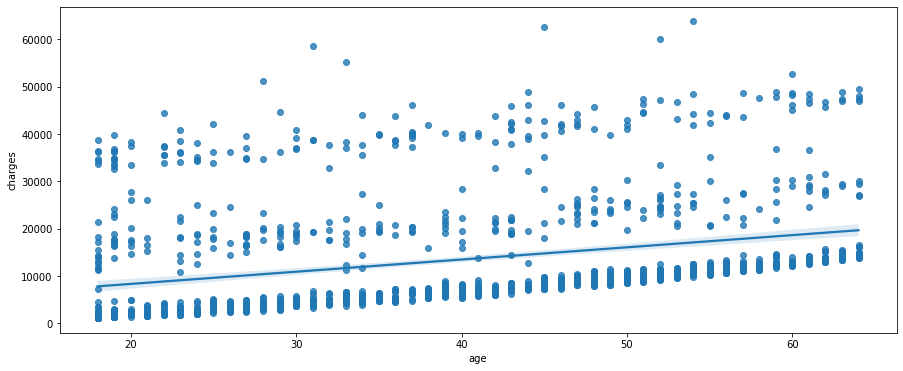

In [ ]:
plt.figure(figsize = (15,6))
sns.regplot(x = 'age',y = 'charges', data = insurance_df)
plt.show()

<AxesSubplot:>

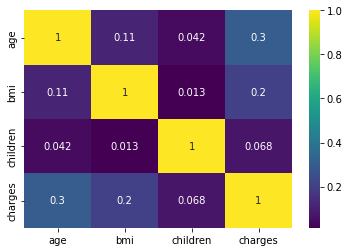

In [ ]:
sns.heatmap(insurance_df.corr(), cmap = 'viridis',annot = True)

# Creating the model

In [ ]:
# Split the data into 80% for training and 30 %
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(insurance_df, test_size = 0.2, random_state = 0)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region,charges
621,37,male,34.100,4,yes,southwest,40182.24600
194,18,male,34.430,0,no,southeast,1137.46970
240,23,female,36.670,2,yes,northeast,38511.62830
1168,32,male,35.200,2,no,southwest,4670.64000
1192,58,female,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,male,26.030,0,no,northeast,3070.80870
835,42,male,35.970,2,no,southeast,7160.33030
1216,40,male,25.080,0,no,southeast,5415.66120
559,19,male,35.530,0,no,northwest,1646.42970


In [ ]:
X_test.head()

,age,sex,bmi,children,smoker,region,charges
578,52,male,30.200,1,no,southwest,9724.53000
610,47,female,29.370,1,no,southeast,8547.69130
569,48,male,40.565,2,yes,northwest,45702.02235
1034,61,male,38.380,0,no,northwest,12950.07120
198,51,female,18.050,0,no,northwest,9644.25250


Autogluon try all the algorithm by creating protypes of the models, and checks which ones is the better

In [ ]:
# here time_limit is in minutes
# Train multiple ML Regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or
# regression type problems from the 'Label' column
# For regression type problems, 'Labels

In [ ]:
predictor = TabularPredictor(label = "charges", problem_type = 'regression',
                             eval_metric = 'r2').fit(train_data = X_train,time_limit = 200, 
                                                     presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221130_110412/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20221130_110412/"
AutoGluon Version:  0.6.0
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Sep 29 01:01:23 UTC 2022
Train Data Rows:    1070
Train Data Columns: 6
Label Column: charges
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2635.93 MB
	Train Data (Original)  Memory Usage: 0.23 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849878       1.147185  176.618699                0.000606           0.112116            3       True         11
1        LightGBMXT_BAG_L2   0.848546       1.068085  155.296296                0.383492          37.661459            2       True          9
2      WeightedEnsemble_L2   0.848542       0.422908   98.820278                0.000565           0.305460            2       True          8
3          CatBoost_BAG_L1   0.846672       0.032763   18.542502                0.032763          18.542502            1       True          5
4        LightGBMXT_BAG_L1   0.840820       0.056536   19.111053                0.056536          19.111053            1       True          3
5          LightGBM_BAG_L2   0.840035       0.763087  138.845124                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'CatBoost_BAG_L1': 0.8466715382588097,
  'NeuralNetFastAI_BAG_L1': 0.836500111589254,
  'XGBoost_BAG_L1': 0.8333796770971251,
  'WeightedEnsemble_L2': 0.848541712727081,
  'LightGBMXT_BAG_L2': 0.

In [ ]:
# EVALUATE TRAINING MODEL PERFORMANCE

In [ ]:
predictor.leaderboard()

                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849878       1.147185  176.618699                0.000606           0.112116            3       True         11
1        LightGBMXT_BAG_L2   0.848546       1.068085  155.296296                0.383492          37.661459            2       True          9
2      WeightedEnsemble_L2   0.848542       0.422908   98.820278                0.000565           0.305460            2       True          8
3          CatBoost_BAG_L1   0.846672       0.032763   18.542502                0.032763          18.542502            1       True          5
4        LightGBMXT_BAG_L1   0.840820       0.056536   19.111053                0.056536          19.111053            1       True          3
5          LightGBM_BAG_L2   0.840035       0.763087  138.845124                0.078494          21.210286            2       True         10

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.849878,1.147185,176.618699,0.000606,0.112116,3,True,11
1,LightGBMXT_BAG_L2,0.848546,1.068085,155.296296,0.383492,37.661459,2,True,9
2,WeightedEnsemble_L2,0.848542,0.422908,98.820278,0.000565,0.305460,2,True,8
3,CatBoost_BAG_L1,0.846672,0.032763,18.542502,0.032763,18.542502,1,True,5
4,LightGBMXT_BAG_L1,0.840820,0.056536,19.111053,0.056536,19.111053,1,True,3
5,LightGBM_BAG_L2,0.840035,0.763087,138.845124,0.078494,21.210286,2,True,10
6,LightGBM_BAG_L1,0.839615,0.065165,20.062224,0.065165,20.062224,1,True,4
7,NeuralNetFastAI_BAG_L1,0.836500,0.161837,35.282809,0.161837,35.282809,1,True,6
8,XGBoost_BAG_L1,0.833380,0.162578,24.627283,0.162578,24.627283,1,True,7
9,KNeighborsUnif_BAG_L1,-0.074486,0.103691,0.004387,0.103691,0.004387,1,True,1


                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.849878       1.147185  176.618699                0.000606           0.112116            3       True         11
1        LightGBMXT_BAG_L2   0.848546       1.068085  155.296296                0.383492          37.661459            2       True          9
2      WeightedEnsemble_L2   0.848542       0.422908   98.820278                0.000565           0.305460            2       True          8
3          CatBoost_BAG_L1   0.846672       0.032763   18.542502                0.032763          18.542502            1       True          5
4        LightGBMXT_BAG_L1   0.840820       0.056536   19.111053                0.056536          19.111053            1       True          3
5          LightGBM_BAG_L2   0.840035       0.763087  138.845124                0.078494          21.210286            2       True         10

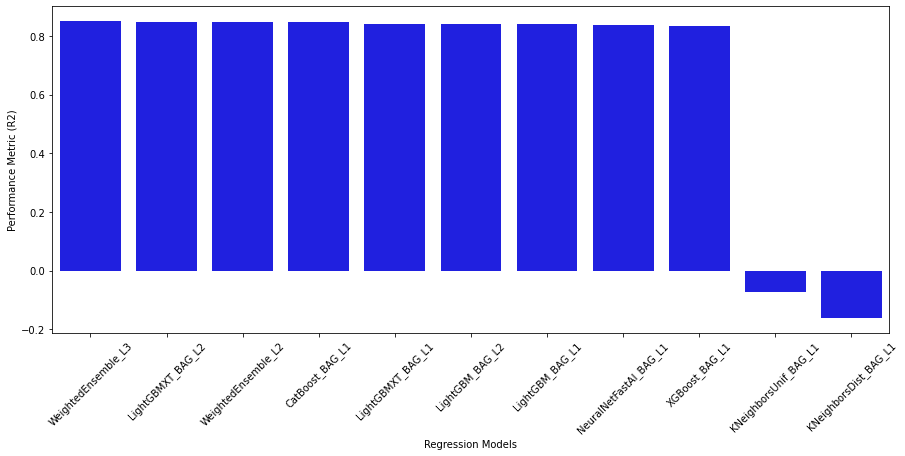

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(X_test)

Evaluation: r2 on test data: 0.9040486204581387
Evaluations on test data:
{
    "r2": 0.9040486204581387,
    "root_mean_squared_error": -3907.5234370701296,
    "mean_squared_error": -15268739.411252359,
    "mean_absolute_error": -2391.455362354594,
    "pearsonr": 0.9513000124322755,
    "median_absolute_error": -1555.9901527343748
}


{'r2': 0.9040486204581387,
 'root_mean_squared_error': -3907.5234370701296,
 'mean_squared_error': -15268739.411252359,
 'mean_absolute_error': -2391.455362354594,
 'pearsonr': 0.9513000124322755,
 'median_absolute_error': -1555.9901527343748}

In [ ]:
y_test = X_test['charges']

Text(0.5, 0, 'True Values')

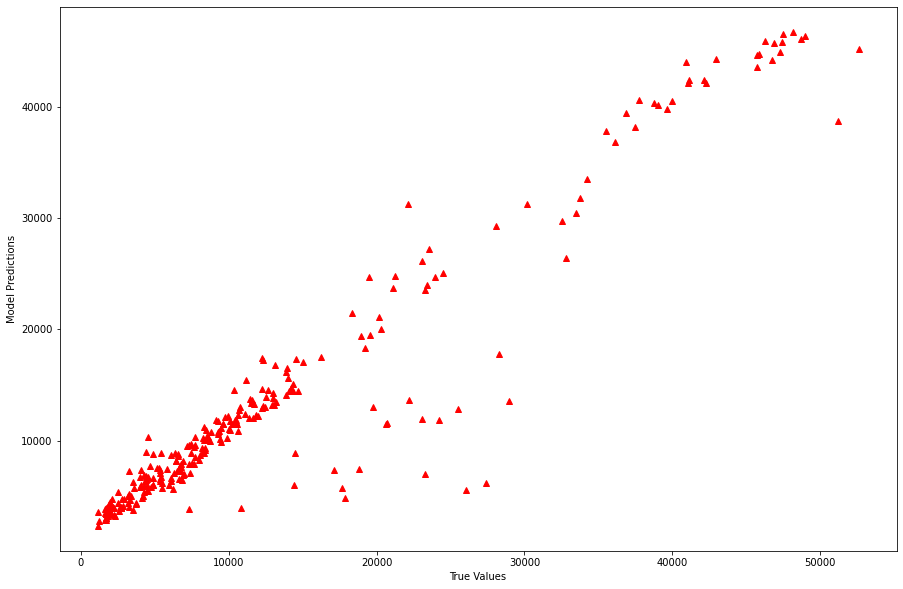

In [ ]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')